In [49]:
# high-performance data manipulation and analysis tool 
import pandas as pd

#data visualization and graphical plotting library for Python and its numerical extension NumPy
import matplotlib.pyplot as plt

#a large library of high-level mathematical functions to operate on matrices and arrays
import numpy as np

#to interact with the underlying operating system
import os

#For ignoring Warning
import warnings
warnings.filterwarnings("ignore")

# For splitting the data into train and test
from sklearn.model_selection import train_test_split

# Standardizing(mean is 0 and sd is 1 .i.e. Normal Distribution) for convenient preprocessing 
from sklearn.preprocessing import StandardScaler

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [50]:
pip install tensorflow

In [52]:
os.getcwd()

'C:\\Users\\User\\Desktop\\Github\\Deep  Learning'

In [53]:
df = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

In [54]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
df.drop(['CustomerId', 'Surname'],axis = 1, inplace= True)

In [56]:
df.shape

(10000, 11)

In [57]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [58]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [59]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [60]:
X = df.iloc[:, :10]
y = df.iloc[:, 10]
# X.columns
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [61]:
# Creating dummies for geography and gender column and droping the first

X= pd.get_dummies(X,prefix=['Geography','Gender'], columns=['Geography','Gender'],drop_first=True)

In [62]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,0,0,0


In [63]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [64]:
X.shape

(10000, 11)

In [65]:
y.shape

(10000,)

In [66]:
X.shape

(10000, 11)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [68]:
std_scaler = StandardScaler()

In [69]:
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [70]:
# Initialising the ANN
classifier = Sequential()

In [83]:
# Adding the input layer and the first hidden layer
classifier.add(Dense( units = 
                     6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))

In [84]:
# Adding the second hidden layer
classifier.add(Dense(units =  6,kernel_initializer='he_uniform',activation='relu'))

In [85]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [86]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [88]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 0.5236 - accuracy: 0.7962 - val_loss: 0.5046 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4961 - accuracy: 0.7962 - val_loss: 0.4966 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4845 - accuracy: 0.7962 - val_loss: 0.4865 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4724 - accuracy: 0.7962 - val_loss: 0.4773 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4633 - accuracy: 0.7962 - val_loss: 0.4696 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4558 - accuracy: 0.7962 - val_loss: 0.4632 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4496 - accuracy: 0.7962 - val_loss: 0.4579 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3710 - accuracy: 0.8339 - val_loss: 0.3935 - val_accuracy: 0.8262
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3704 - accuracy: 0.8350 - val_loss: 0.3927 - val_accuracy: 0.8258
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3696 - accuracy: 0.8350 - val_loss: 0.3927 - val_accuracy: 0.8270
Epoch 61/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3694 - accuracy: 0.8337 - val_loss: 0.3918 - val_accuracy: 0.8266
Epoch 62/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3689 - accuracy: 0.8352 - val_loss: 0.3917 - val_accuracy: 0.8262
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3684 - accuracy: 0.8356 - val_loss: 0.3916 - val_accuracy: 0.8273
Epoch 64/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3681 - accuracy: 0.8364 - val_loss: 0.3912 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


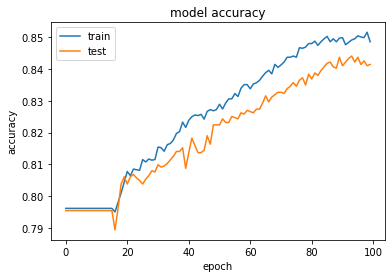

In [94]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

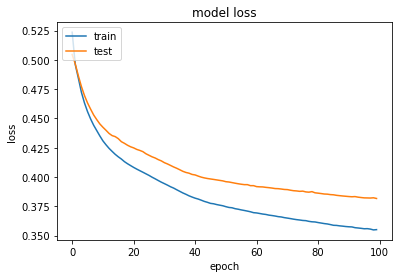

In [95]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [91]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [93]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8445